# 1.0 Importando dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv('data/dados.csv')
dataframe.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [3]:
print('Matriz do dataframe:', dataframe.shape)
print('Total de dados nulos:', dataframe.isna().sum().sum())
print(dataframe.dtypes)

Matriz do dataframe: (76840, 7)
Total de dados nulos: 0
UF                  int64
Sexo                int64
Idade               int64
Cor                 int64
Anos de Estudo      int64
Renda               int64
Altura            float64
dtype: object


# 2.0 Tipos de variáveis

## Qualitativas

### 1. Nominais

In [4]:
# Dados nominais não contém uma ordementre si, são dados nominais no nosso dataframe: [UF, Sexo, Cor]
print(dataframe.UF.unique())
print(dataframe.Sexo.unique())
print(dataframe.Cor.unique())

[11 12 13 14 15 16 17 21 22 23 24 25 26 27 28 29 31 32 33 35 41 42 43 50
 51 52 53]
[0 1]
[8 2 4 6 0]


### 2. Ordinárias

In [5]:
# Dados ordinários contém uma ordem entre sí, são dados ordinários do nosso dataframe: [Anos de estudo]
print(dataframe['Anos de Estudo'].unique())

[12 15  6  9 14 16 10  1  5  7  3  2  4  8 11 17 13]


## Quantitativos

### 1. Discretos

In [6]:
# Dados enumeráveis ou contáveis, são esses [Idade]
print(dataframe.Idade.unique())

[23 35 46 47 34 57 60 50 26 49 52 38 45 43 53 62 69 41 25 33 44 65 32 30
 64 31 63 40 28 37 39 36 73 56 27 42 51 29 24 55 67 66 61 54 48 80 79 71
 59 19 22 77 58 17 72 70 18 21 20 68 74 76 75 84 85 78 15 82 95 13 83 81
 87 88 16 91 92 97 89 90 86 94 14 99]


### 2. Contínuas

In [7]:
# Dados infinitos, são esses: [Renda, Altura]
print(dataframe.Renda.unique())
print(dataframe.Altura.unique())

[  800  1150   880 ... 36000  1329  5260]
[1.60380762 1.73978983 1.76044382 ... 1.83058738 1.72634426 1.65830485]


# 3.0 Distribuição de frequência

In [8]:
frequencia = dataframe['Sexo'].value_counts()

In [9]:
percentual = dataframe['Sexo'].value_counts(normalize = True) * 100

In [10]:
tmp = {"Frequência" : frequencia, "Percentual" : percentual}

dist_freq_qualitativas = pd.DataFrame(tmp)
dist_freq_qualitativas

,Frequência,Percentual
0,53250,69.299844
1,23590,30.700156


In [11]:
tmp = {0 : "Masculino", 1 : "Feminino"}
dist_freq_qualitativas.rename(index = tmp, inplace=True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 1, inplace = True)
dist_freq_qualitativas

Sexo,Frequência,Percentual
Masculino,53250,69.299844
Feminino,23590,30.700156


In [12]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [13]:
frequencia = pd.crosstab(dataframe.Sexo, dataframe.Cor)
frequencia.rename(index=sexo, columns=cor, inplace=True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


# 4.0 Distribuição de frequência

In [14]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

In [25]:
frequencia = pd.value_counts(pd.cut(x = dataframe.Renda, bins = classes, labels = labels, include_lowest=True))

In [26]:
percentual = pd.value_counts(pd.cut(x = dataframe.Renda, bins = classes, labels = labels, include_lowest=True), normalize=True)

In [27]:
tmp = {'Frequência' : frequencia, 'Percentual' : percentual}
dist_frequencia_quantitativas = pd.DataFrame(tmp)
dist_frequencia_quantitativas

,Frequência,Percentual
E,49755,0.647514
D,16700,0.217335
C,7599,0.098894
B,2178,0.028345
A,608,0.007913


# 5.0 Histogramas

In [28]:
import seaborn as sns

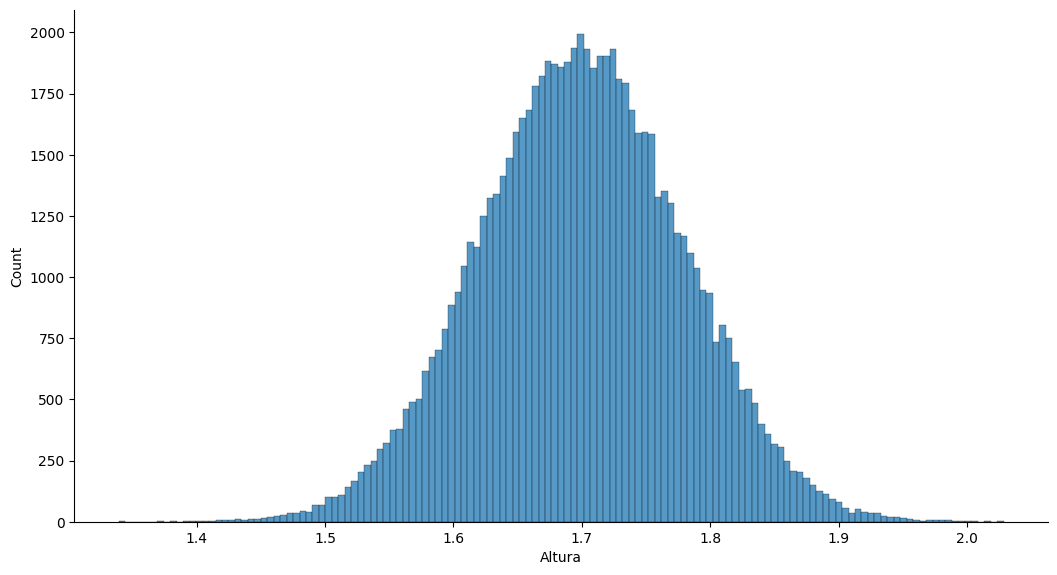

In [32]:
ax = sns.displot(dataframe.Altura)
ax.figure.set_size_inches(12, 6)

<AxesSubplot:>

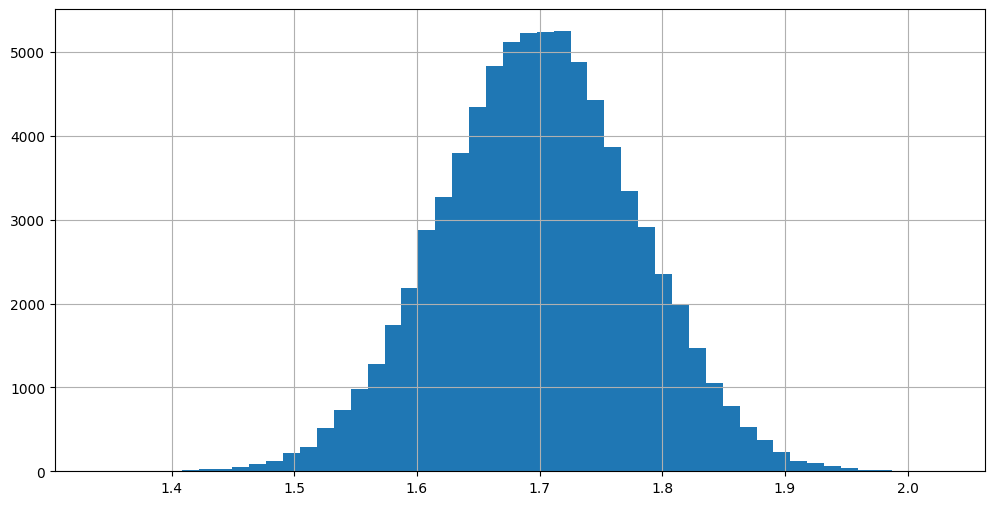

In [36]:
dataframe.Altura.hist(bins = 50, figsize = (12, 6))

# 6.0 Medidas de tendência central

In [37]:
df = pd.DataFrame(data = {'Fulano': [8, 10, 4, 8, 6, 10, 8],
                          'Beltrano': [10, 2, 0.5, 1, 3, 9.5, 10],
                          'Sicrano': [7.5, 8, 7, 8, 8, 8.5, 7]},
                 index = ['Matemática',
                          'Português',
                          'Inglês',
                          'Geografia',
                          'História',
                          'Física',
                          'Química'])
df.rename_axis('Matérias', axis = 'columns', inplace = True)
df

Matérias,Fulano,Beltrano,Sicrano
Matemática,8,10.0,7.5
Português,10,2.0,8.0
Inglês,4,0.5,7.0
Geografia,8,1.0,8.0
História,6,3.0,8.0
Física,10,9.5,8.5
Química,8,10.0,7.0


## 6.1 Média aritmética

In [42]:
# Método groupby, agrupada observações por grupos específico, colocando o grupo no index

dataframe.groupby(['Cor'])['Renda'].mean()

Cor
0    1472.887955
2    2679.019331
4    1442.294840
6    4182.920455
8    1513.596103
Name: Renda, dtype: float64

## 6.2 Mediana

In [55]:
notas_fulano = df.Fulano

In [56]:
notas_fulano = notas_fulano.sort_values()
notas_fulano = notas_fulano.reset_index()
notas_fulano

,index,Fulano
0,Inglês,4
1,História,6
2,Matemática,8
3,Geografia,8
4,Química,8
5,Português,10
6,Física,10


In [58]:
notas_fulano['Fulano'].median()

8.0

## 6.3 Moda

In [64]:
df['Fulano'].mode().loc[0]

8

# 7.0 Relação entre média, mediana e moda

In [68]:
renda_media = dataframe.Renda.mean()
renda_mediana = dataframe.Renda.median()
renda_moda = dataframe.Renda.mode()[0]

In [69]:
print(renda_media, renda_mediana, renda_moda)

2000.3831988547631 1200.0 788


Moda < Mediana < Média


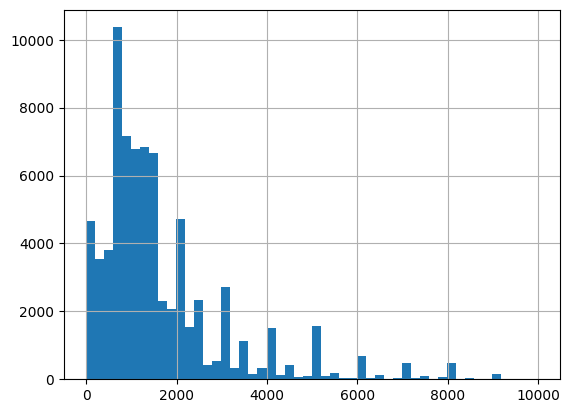

In [88]:
dataframe.query('Renda < 10000').Renda.hist(bins = 50)
print('Moda < Mediana < Média')

Moda = Mediana = Média


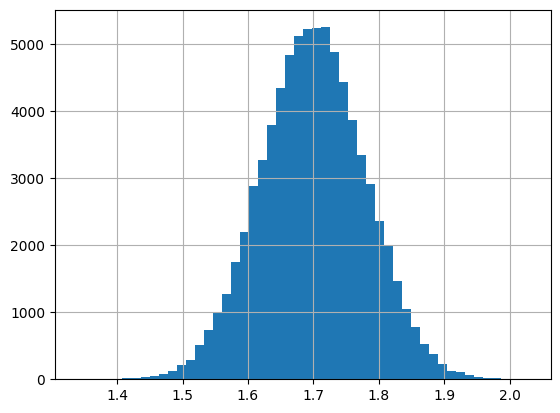

In [87]:
dataframe.Altura.hist(bins = 50)
print('Moda = Mediana = Média')

# 8.0 Medidas separativeis

In [90]:
print('25th :', dataframe.Renda.quantile(q = 0.25))
print('50th :', dataframe.Renda.quantile(q = 0.50))
print('75th :', dataframe.Renda.quantile(q = 0.75))

25th : 788.0
50th : 1200.0
75th : 2000.0


In [95]:
[x / 10 for x in range(1, 11, 1)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [94]:
dataframe.Renda.quantile([x / 10 for x in range(1, 11, 1)])

0.1       350.0
0.2       788.0
0.3       800.0
0.4      1000.0
0.5      1200.0
0.6      1500.0
0.7      1900.0
0.8      2500.0
0.9      4000.0
1.0    200000.0
Name: Renda, dtype: float64

In [97]:
dataframe.Renda.quantile([x / 100 for x in range(1, 101, 1)])

0.01         0.0
0.02         0.0
0.03         0.0
0.04        50.0
0.05       100.0
          ...   
0.96      7000.0
0.97      8000.0
0.98     10000.0
0.99     15000.0
1.00    200000.0
Name: Renda, Length: 100, dtype: float64

# 9.0 Box plot

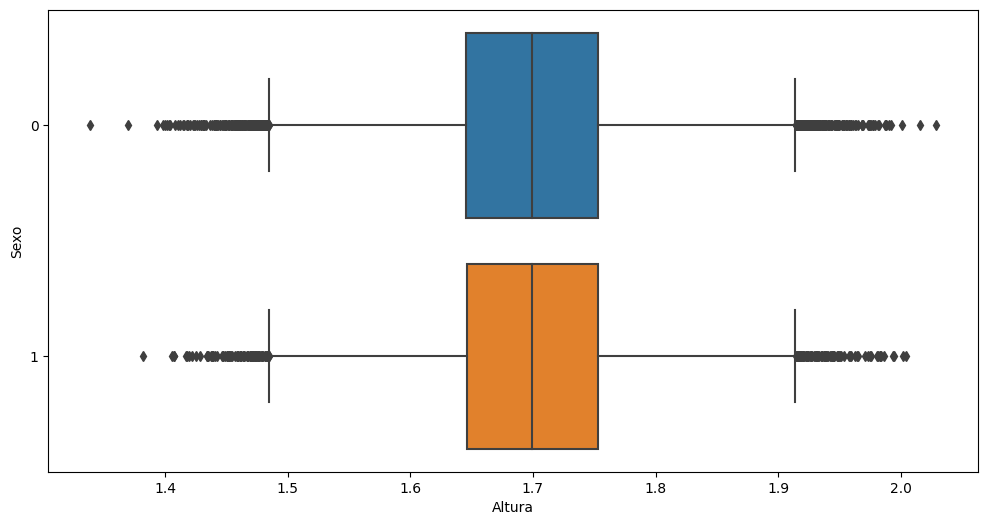

In [116]:
ax = sns.boxplot(x = 'Altura', y = 'Sexo', data = dataframe, orient='h')
ax.figure.set_size_inches(12, 6)

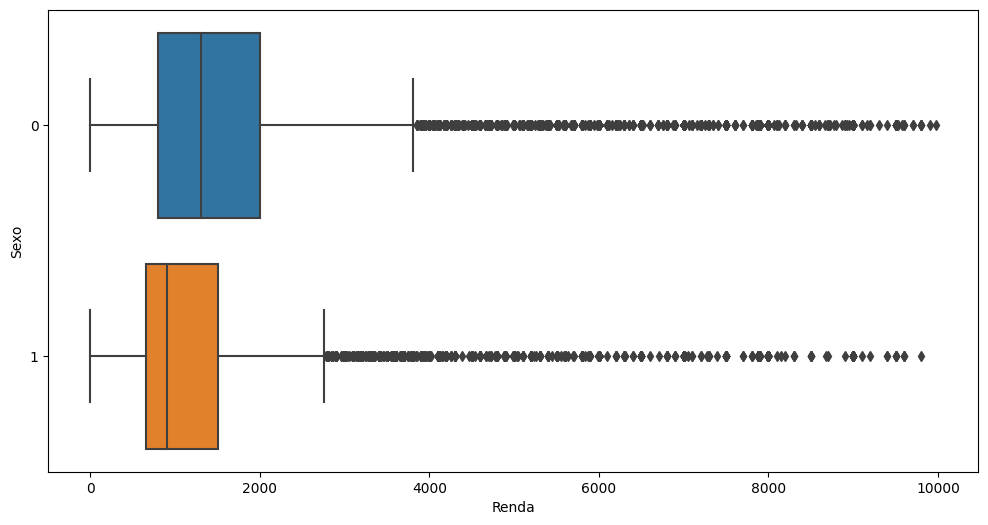

In [115]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = dataframe.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(12, 6)

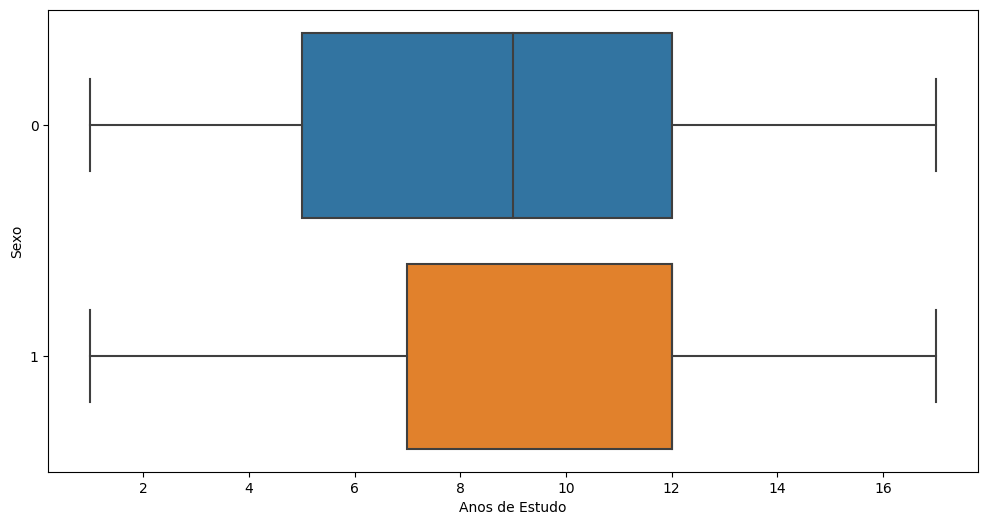

In [119]:
ax = sns.boxplot(x = 'Anos de Estudo', y = 'Sexo', data = dataframe.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(12, 6)

# 10.0 Medidas de dispersão

## 10.1 Desvio médio absoluto

In [124]:
notas_fulano = df[['Fulano']]
notas_fulano

Matérias,Fulano
Matemática,8
Português,10
Inglês,4
Geografia,8
História,6
Física,10
Química,8


In [128]:
notas_fulano['Desvio'] = notas_fulano.Fulano - notas_fulano.Fulano.mean()

/home/joel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
notas_fulano['|Desvio|'] = notas_fulano.Desvio.abs()

In [131]:
notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [133]:
notas_fulano['|Desvio|'].mean()

1.5510204081632648

In [135]:
desvio_padrao_absoluto = notas_fulano.Fulano.mad()
desvio_padrao_absoluto

1.5510204081632648

## 10.2 Variância

In [139]:
notas_fulano

Matérias,Fulano,Desvio,|Desvio|
Matemática,8,0.285714,0.285714
Português,10,2.285714,2.285714
Inglês,4,-3.714286,3.714286
Geografia,8,0.285714,0.285714
História,6,-1.714286,1.714286
Física,10,2.285714,2.285714
Química,8,0.285714,0.285714


In [143]:
notas_fulano['Desvio ^ 2'] = notas_fulano.Desvio ** 2

In [138]:
variancia = notas_fulano.Fulano.var()

In [150]:
variancia2 = notas_fulano['Desvio ^ 2'].sum() / (len(notas_fulano) - 1)

In [151]:
variancia == variancia2

True

## 10.3 Desvio padrão

In [158]:
desvio_padrao = variancia ** (1 / 2)
desvio_padrao

2.1380899352993947

In [159]:
notas_fulano['Fulano'].describe()

count     7.000000
mean      7.714286
std       2.138090
min       4.000000
25%       7.000000
50%       8.000000
75%       9.000000
max      10.000000
Name: Fulano, dtype: float64